## What is the most optimal skill to learn for Data Scientists?

Methodology

1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
# Filter data scientists jobs in the UK

df_DS_UK = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United Kingdom')].copy()

df_DS_UK = df_DS_UK.dropna(subset=['salary_year_avg'])

df_DS_UK_exploded = df_DS_UK.explode('job_skills')

df_DS_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
1107,157500.0,python
1107,157500.0,numpy
1107,157500.0,pandas
1107,157500.0,scikit-learn
13764,109500.0,excel


In [14]:
# Grouping the dataframe
df_DS_skills = df_DS_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DS_job_count = len(df_DS_UK)

df_DS_skills['skill_percent'] = df_DS_skills['skill_count']/DS_job_count * 100

skill_percent = 10

df_DS_skills_high_demand = df_DS_skills[df_DS_skills['skill_percent'] > skill_percent]

df_DS_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,50,89885.0,66.666667
sql,46,97985.0,61.333333
aws,22,88128.0,29.333333
r,18,113360.5,24.000000
tableau,15,111500.0,20.000000
excel,11,80850.0,14.666667
gcp,9,131867.0,12.000000
looker,9,113500.0,12.000000
numpy,9,88128.0,12.000000


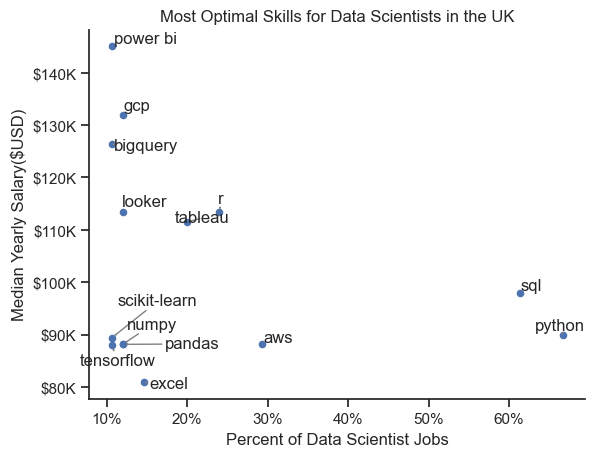

In [22]:
# Plotting results

from adjustText import adjust_text


df_DS_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DS_skills_high_demand.index):
    texts.append(plt.text(df_DS_skills_high_demand['skill_percent'].iloc[i], df_DS_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Most Optimal Skills for Data Scientists in the UK')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout
plt.show()